# Iterated Prisoner's Dilemma

## The problem
The Prisoner's dilemma is an example of a game that shows why two rational individuals might not cooperate, even if it appears in their best interest to do so.  
The example cites as follows:  
"Two members of a criminal gang are arrested and imprisoned. Each prisoner is in solitary confinement with no means of speaking to or exchanging messages with the other. The police admit they don't have enough evidence to convict the pair on the principal charge. They plan to sentence both to a year in prison on a lesser charge. Simultaneously, the police offer each prisoner a Faustian bargain." ([cit](https://www.worldcat.org/title/prisoners-dilemma/oclc/23383657))

Each player A and B has two actions: cooperate (C) with the other prisoner or defect (D), giving them up to the autorities. Both players decide on their action without knowing the action of the other player.

In the following matrix, the values $(A_{i,j},B_{i,j})$ refer to the payoff A and B, respectively, would get in the case A chose action $i$ and B chose action $j$, where $i,j \in \{ \text{cooperate}, \text{defect}\}$. 

$$
\begin{aligned}
& \text {Payoff matrix }\\
&\begin{array}{cccc}
\hline \hline  &  & \qquad \text{Prisoner B} \\
 &  & \text{Cooperate}  & \text{Defect} \\
\text{Prisoner A} & \text{Cooperate} & (R,R) & (S,T) \\
 & \text{Defect} & (T,S) & (P,P) \\
\hline
\end{array}
\end{aligned}
$$
This table defines a Prisoner’s Dilemma game if $T > R > P > S$ and $2R > S + T$. This way, the dilemma unfolds: For each player it is individually beneficial to defect, irrespective of the choice of his opponent. The highest mutual payoff, however, is generated when both players cooperate.

It is assumed that both prisoners understand the nature of the game, have no loyalty to each other, and will have no opportunity for retribution or reward outside the game. 

### Iterated version
If two players play the game more than once in succession and they remember previous actions of their opponent and change their strategy accordingly, the game is called Iterated Prisoner's Dilemma (IPD).  
After each game, each player observes both the previous action of their opponent and their own previous action.

## Formalisation
The prisoner's dilemma is a 2-player Matrix game, has only four states and two choices of actions. Since the reward (payoff) for a given action depends also on the actions of the other player, it is an adversarial bandits problem.  
The four states consist of all possible combinations of actions for (A's previous action, B's previous action): $(C,C), (C,D), (D,C), (D,D)$. However, this setting can be simplified in some cases presented later.

At each time $t$, the player simultaneously choose their actions. The rewards depend on both actions, and they can be written as the payoff matrix reported above.  

Considering the set of possible actions, if for any pair no individual player can benefit by changing its individual strategy, then that's a Nash equilibrium.
There has been [research](https://www.pnas.org/doi/10.1073/pnas.1206569109) showing that only one single previous state is needed, in order to define any prisoner’s dilemma strategy.

### Q-Learning 
One agent learns the value function via Q-learning, a reinforcement learning technique developed in $1989$ that iteratively updates expected cumulative discounted reward $Q$ given a state $s$, and a future action $a$ (from [Sutton and Barto](http://incompleteideas.net/book/the-book-2nd.html)):  
<img src="Qlearning.png" width="500">

The action gets chosen using a decaying $\varepsilon$-greedy policy, that is, 
$$A_t = \begin{cases} \max_a Q(A_t) \quad \text{with probability } 1- \varepsilon \\ \text{random action} \quad \text{with probability }\varepsilon \end{cases}$$

As the update rule does not depend on the current exploration but on the assumed optimal choice, Q-Learning does not require the current policy to converge towards the optimal policy, therefore doesn't strictly need the decaying $\varepsilon$, as for example SARSA would. Q-learning is able to generate an optimal policy even using only uniformly random actions, given sufficient iterations. Nevertheless, 

The parameters used will be:
* The values $R = 3$, $S = 0$, $T =5$, $P=1$ for the payoff matrix
* a discount factor $\gamma = 0.95$
* a learning rate $\alpha = 0.1$
* a starting epsilon $\varepsilon = 0.3$, with a decay of $0.999$ per step, reaching a minimum of $\varepsilon = 0.1$

The payoff matrix is
$$
\begin{aligned}
& \text {Payoff matrix }\\
&\begin{array}{cccc}
\hline \hline  &  & \qquad \text{Prisoner B} \\
 &  & \text{Cooperate}  & \text{Defect} \\
\text{Prisoner A} & \text{Cooperate} & (3,3) & (0,5) \\
 & \text{Defect} & (5,0) & (1,1) \\
\hline
\end{array}
\end{aligned}
$$

### Opponent's strategies
Over time various deterministic strategies in the IPD game emerged. The ones that will be considered here are:
* *Always cooperate*: always cooperate, indepentently of period or observed actions. If played against itself, it always receives an average reward of 3 in this setting.
* *Always defect*:  This strategy is by definition unexploitable and will always have at least the same average reward as the opposing strategy.
* *Random action*: As the name implies, this strategy plays a random action independent of period and observations. The probability to play a cooperation is here st to $0.5$.
* *Tit-for-tat*: This strategy starts with a cooperation and copies the move of the opponent in the following periods.

In the first three cases, the state space could be simplified to a single default state, as these strategies do not react to their observations and are therefore always in the same situation.  
In the case of Tit-for-tat, two states would be sufficient, and they depend on whether a defection has been observed in the previous period or not.  
However, as we assume the strategy of the opponent is not known to the player, the state space cannot be simplified and all 4 possible states must be considered.

## Goal
The questions this project tries to answer are: can a Q-Learning agent learn to play:
* vs a deterministic strategy?
* vs another Q-Learning agent?

## Implementation

First, import all needed classes and functions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from utils import Game, Meeting
from strategy import Cooperate, Defect, Random, TitforTat, QLearning

Let's define the payoff matrix, and the possible actions. We can instantiate a first game with them, and get the Nash equilibrium.

In [2]:
# define payoff matrix
payoff =[[(3,3),(0,5)],[(5,0),(1,1)]]

# initiate game with two possible actions: cooperate or defect
# numeric action codes: [0,1]
actions = [0,1] 
g = Game(payoff, actions)

# returns a list of Nash equilibrium indexes
g.getNash() 

[(1, 1)]

As expected, the Nash equilibrium is to defect.

Let's see how the strategies play out. Remember that 0 = Cooperate, 1 = Defect.

In [3]:
# test action classes
for strategy in [Cooperate(), Defect(), Random()]: 
    s1 = strategy
    print(s1.name,end=" ")
    for i in range (0,20):
        print(s1.get_action(i), end=' ')
    print('\n')

cooperate 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

defect 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

random 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 



To test Tit-for-Tat, we need an opponent, so we create a meeting. The player starts by cooperating, to then copy the opponent's previous action.  
```pretty_print()``` reports the first (max 50) actions for each player and their scores. The score is the sum of the scores obtained on each game, according to the payoff matrix. The higher the better.

In [4]:
m = Meeting(g, TitforTat(), Random(), 20)
m.run()
m.pretty_print()

TitforTat	0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 ... 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 = 43
random	0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 ... 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 = 43


We can also display the counter for how many times each player decided to cooperate.

In [5]:
s1 = TitforTat()
s2 = Defect()
m = Meeting(g, s1, s2, 100)
m.run()
m.pretty_print()

print()
print("Number of cooperations : " )
print (m.s1.name + "\t" + str(m.num_cooperation_s1))
print (m.s2.name + "\t" + str(m.num_cooperation_s2))

TitforTat	0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 = 99
defect	1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 = 104

Number of cooperations : 
TitforTat	1
defect	0


### All vs all

Let's play every strategy against every opponent, counting the average reward per game of Player 1 against Player 2.  
Again, each time the cell is ran the results can vary due to randomness, although the decision to run the same meeting multiple times to infer the results was made to reduce the effect.

In [42]:
payoff =[[(3,3),(0,5)],[(5,0),(1,1)]]
actions = [0,1] 
g = Game(payoff, actions)

strategies = [Cooperate(), Defect(), Random(), TitforTat(), QLearning()]
avg_reward_table = []
wins_table = []
runs = 100
games = 10000

for player1 in strategies:
    avg_reward = []
    wins_percent = []
    for player2 in strategies:
        tot_reward = 0
        tot_wins = 0
        for i in range(runs):
            s1 = player1
            s2 = player2
            m = Meeting(g, s1, s2, games)
            m.run()
            tot_reward += m.s1_score
            if m.s1_score > m.s2_score:
                tot_wins += 1
        avg_reward.append(tot_reward/(runs*games))
        wins_percent.append(tot_wins/runs)
    avg_reward_table.append(avg_reward)
    wins_table.append(wins_percent)

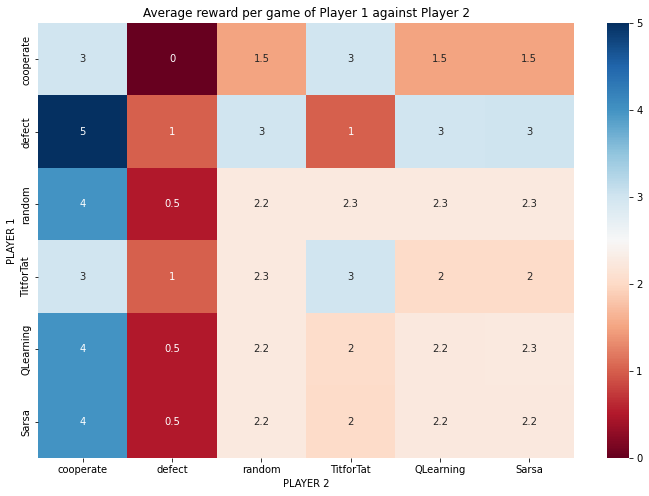

In [43]:
df = pd.DataFrame(avg_reward_table, index = [s.name for s in strategies], columns = [s.name for s in strategies])

plt.figure(figsize = (12,8))
s = sn.heatmap(df, annot=True, cmap = 'RdBu')
s.set(xlabel='PLAYER 2', ylabel='PLAYER 1', title=f'Average reward per game of Player 1 against Player 2');

Each player's goal is to maximise their own reward.  
As we can see from the table, always cooperating is the worst strategy, as it leads to the worst average results in most cases and, even in its best cases, the rewards are  only slightly above average.
Second worse to Cooperate is Tit-for-Tat, which follows its same trend but with less extreme below-average results.  
Like the Nash equilibrium suggested, the best bet is to always defect. That way, whichever action Player 2 chooses, Player 1's payoff will always be the highest possible. The obtained reward is, in $66\%$ of cases, above average, and there is a possibility to obtain the highest payoff possible, which other strategies don't have.  

To help answer the original questions, let's plot also the percentage of wins.

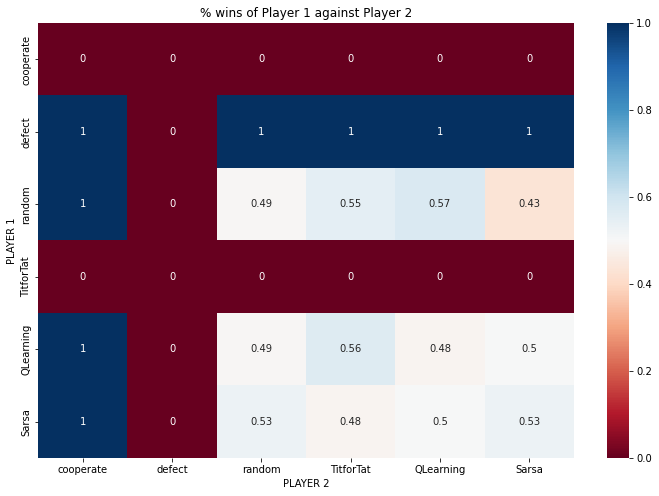

In [41]:
df = pd.DataFrame(wins_table, index = [s.name for s in strategies], columns = [s.name for s in strategies])

plt.figure(figsize = (12,8))
s = sn.heatmap(df, annot=True, cmap = 'RdBu')
s.set(xlabel='PLAYER 2', ylabel='PLAYER 1', title=f'% wins of Player 1 against Player 2');

### Q-learning

Let's see if the Q-learning agent has learnt some strategies against the different opponents by exploring the resulting Q tables.

In [31]:
# how to read the Q table:
# first as states:
# [[I cooperate],         in each block:  
#                         [[they cooperate],                   in each row, for action:
#  [I defect   ]]         [they defect   ]]                    [next is cooperate, next is defect]

In [33]:
s1 = QLearning()
s2 = Cooperate()
m = Meeting(g, s1, s2, 20000)
m.run()
m.pretty_print()
m.s1.print_qtable()

QLearning	0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ... 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 = 80250
cooperate	0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 = 29625


array([[[49.70859129,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        , 86.74944696],
        [ 0.        ,  0.        ]]])

The RL agent gets a heavy win, as expected.  
The Q table is updated only for instances when the opponent cooperates, as the agent has no occasions to explore the other states. The learnt strategy is basically to repeat my last action, so to cooperate if I cooperated earlier, and to defect otherwise. This is backed by the printed sequence: the agent repeats the same action for many games consecutively, until a randomized action doesn't kick in and changes the state.

In [34]:
s1 = QLearning()
s2 = Defect()
m = Meeting(g, s1, s2, 20000)
m.run()
m.pretty_print()
m.s1.print_qtable()

QLearning	1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 = 10156
defect	1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 = 59376


array([[[ 0.3       ,  0.        ],
        [ 8.65366722,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        , 10.47025546]]])

The Q-learner loses drastically to the defecting opponent, as predicted from the table above.  CHECK FIRST UPDATE

In [35]:
s1 = QLearning()
s2 = Random()
m = Meeting(g, s1, s2, 20000)
m.run()
m.pretty_print()
m.s1.print_qtable()

QLearning	0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 = 45242
random	0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 ... 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 = 43992


array([[[28.71320167,  0.        ],
        [40.44785564,  0.        ]],

       [[ 0.        , 47.06017149],
        [ 0.        , 50.8137304 ]]])

In [36]:
s1 = QLearning()
s2 = TitforTat()
m = Meeting(g, s1, s2, 20000)
m.run()
m.pretty_print()
m.s1.print_qtable()

QLearning	1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 ... 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 = 40364
TitforTat	0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 ... 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 = 40364


array([[[31.67689461,  0.        ],
        [45.93718164,  0.        ]],

       [[ 0.        , 38.06001446],
        [ 0.        , 34.40022303]]])

In [37]:
s1 = QLearning()
s2 = QLearning()
m = Meeting(g, s1, s2, 20000)
m.run()
m.pretty_print()
m.s1.print_qtable()

QLearning	0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 = 45228
QLearning	0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 = 45958


array([[[50.71943028,  0.        ],
        [36.98593753,  0.        ]],

       [[ 0.        , 43.95374157],
        [ 0.        , 47.45683384]]])

With all these past four strategies, the player learns to, whatever the opponent does, repeat their last action. Again, this changes only if a randomised action comes into play. As we're using a decaying $\varepsilon$-greedy policy, this happens less and less frequently as the games go on.  

However, by looking closer at the Q values,  POSSO CONCLUDERE CHE LA COSA MIGLIORE E DEFECT SE IL VALORE PIU ALTO IN TUTTA LA Q TABLE E QUELLO?? no

### ANSWER: Can a Q-learning agent learn to play against a deterministic strategy? And against another RL agent?

The RL agent is able to learn to   